<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### Import the required libraries

In [1]:
# type your code here
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

import scipy.stats as stats
import statsmodels.api as sm

import warnings
warnings.simplefilter('ignore')

from sklearn.linear_model import LinearRegression

#### Read the data

Load the csv file and set the first column as index

In [2]:
# type your code here
df=pd.read_csv('car_price.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df=df.set_index('Car_Name')

In [7]:
df['Fuel_Type']=pd.get_dummies(df['Fuel_Type'],drop_first=True)
df['Seller_Type']=pd.get_dummies(df['Seller_Type'],drop_first=True)
df['Transmission']=pd.get_dummies(df['Transmission'],drop_first=True)

In [8]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,,,,,,,,
ritz,2014,3.35,5.59,27000,0,0,1,0
sx4,2013,4.75,9.54,43000,1,0,1,0
ciaz,2017,7.25,9.85,6900,0,0,1,0
wagon r,2011,2.85,4.15,5200,0,0,1,0
swift,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...
city,2016,9.50,11.60,33988,1,0,1,0
brio,2015,4.00,5.90,60000,0,0,1,0
city,2009,3.35,11.00,87934,0,0,1,0


Our objective is to predict the selling price of the cars data.

**The data definition is as follows:** <br><br>
**Car_Name:** name of the car <br>

**YearThis:** year in which the car was bought <br>

**Present_Price:** current ex-showroom price of the car (in lakhs)<br>

**Kms_Driven:** distance completed by the car in km <br>

**Fuel_Type:** fuel type of the car <br>

**Seller_Type:** defines whether the seller is a dealer or an individual<br>

**Transmission:** defines whether the car is manual or automatic <br>

**Owner:** defines the number of owners the car has previously had <br>

**Selling_Price:** price the owner wants to sell the car at (in lakhs) (response variable)

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Build a full model and interpret the beta coefficients </b>
                </font>
            </div>
        </td>
    </tr>
</table>

        Hint: A full model is a model which includes all the features 

In [9]:
# type your code here
x=df.drop('Selling_Price',axis=1)
y=df['Selling_Price']
X=sm.add_constant(x)
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     314.3
Date:                Fri, 29 Oct 2021   Prob (F-statistic):          3.49e-132
Time:                        19:17:15   Log-Likelihood:                -593.74
No. Observations:                 301   AIC:                             1203.
Df Residuals:                     293   BIC:                             1233.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -789.0140     86.407     -9.131      0.000    -959.072    -618.956
Year              0.3933      0.043      9.176      0.000       0.309       0.478
Present_Price     0.4373      0.016     27.405      0.000       0.406       0.469
Kms_Driven    -7.036e-06   3.22e-06     -2.182      0.030   -1.34e-05   -6.89e-07
Fuel_Type         1.8699      0.298      6.273      0.000       1.283       2.457
Seller_Type      -1.1116      0.255     -4.353      0.000      -1.614      -0.609
Transmission     -1.4519      0.327     -4.435      0.000      -2.096      -0.808
Owner            -0.6726      0.422     -1.594      0.112      -1.503       0.158
==============================================================================
Omnibus:                       94.914   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              691.148
Skew:                           1.074   Prob(JB):                    8.30e-151
Kurtosis:                      10.106   Cond. No.                     4.56e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

FSTATS EQUAL TO ZERO AND LESS THAN 0.05,HENCE MODEL IS SIGNIFICANCE AND WE CAN USE THIS MODEL.R-square<1-HENCE MODEL IS FIT

Intercept:-
b0(Beta_Not) is equal To -789.01 
b1(Beta_1) is positive for 3 features (Year, present_price and fuel_type) and negative for remaining features

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is there multicollinearity present? If yes, which variables are involved in multicollinearity?    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

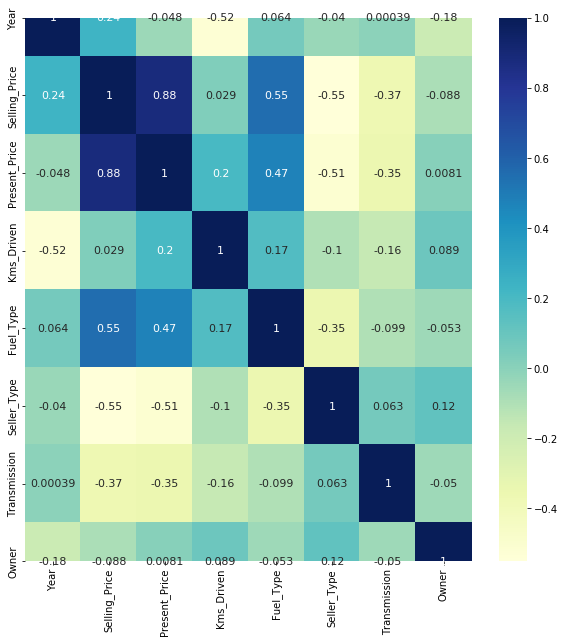

In [10]:
# type your code here
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,annot_kws={"size":11},cmap="YlGnBu")
plt.show()

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
vf = [VIF(X.values,i) for i in range(X.shape[1])]
vif_df=pd.DataFrame(vf,index=X.columns,columns=['VIF'])
vif_df.sort_values(by='VIF',ascending=False)

,VIF
const,722932.115467
Present_Price,1.836258
Kms_Driven,1.517602
Year,1.482224
Seller_Type,1.440631
Fuel_Type,1.373223
Transmission,1.195613
Owner,1.056670


All features have vif(Variance Inflation Factor) < 5,Hence No multicollinearity

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the impact of present price of the car and seller type on the selling price?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
# type your code here
x=df['Present_Price']
y=df['Selling_Price']
X=sm.add_constant(x)
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     1016.
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           3.60e-98
Time:                        19:17:15   Log-Likelihood:                -693.08
No. Observations:                 301   AIC:                             1390.
Df Residuals:                     299   BIC:                             1398.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.7185      0.187      3.847      0.000       0.351       1.086
Present_Price     0.5168      0.016     31.874      0.000       0.485       0.549
==============================================================================
Omnibus:                       59.775   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              926.121
Skew:                           0.084   Prob(JB):                    7.86e-202
Kurtosis:                      11.592   Cond. No.                         15.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Present_Price has a positive correlation with Selling_price and for every unit
increase of Present_Price, Selling_Price increases by 0.5 units. This prediction
of selling_price is 77 % using Present_Price.


FSTATS EQUAL TO ZERO AND LESS THAN 0.05,HENCE MODEL IS SIGNIFICANCE AND WE CAN USE THIS MODEL.R-square<1-HENCE MODEL IS FIT

Present_Price has a positive correlation with Selling_price and for every unit increase of Present_Price, Selling_Price increases by 0.5 units.This prediction of selling_price is 77 %(R_Square=0.773) using Present_Price.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Consider all the numeric features in the data. Do all of them significantly contribute to explaining the variation in the selling price?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
df1=df.copy()
df1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,,,,,,,,
ritz,2014,3.35,5.59,27000,0,0,1,0
sx4,2013,4.75,9.54,43000,1,0,1,0
ciaz,2017,7.25,9.85,6900,0,0,1,0
wagon r,2011,2.85,4.15,5200,0,0,1,0
swift,2014,4.60,6.87,42450,1,0,1,0


In [14]:
# type your code here
x = df1.select_dtypes(exclude='object').drop(['Selling_Price'],axis=1)
y=df['Selling_Price']
X=sm.add_constant(x)
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     314.3
Date:                Fri, 29 Oct 2021   Prob (F-statistic):          3.49e-132
Time:                        19:17:15   Log-Likelihood:                -593.74
No. Observations:                 301   AIC:                             1203.
Df Residuals:                     293   BIC:                             1233.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -789.0140     86.407     -9.131      0.000    -959.072    -618.956
Year              0.3933      0.043      9.176      0.000       0.309       0.478
Present_Price     0.4373      0.016     27.405      0.000       0.406       0.469
Kms_Driven    -7.036e-06   3.22e-06     -2.182      0.030   -1.34e-05   -6.89e-07
Fuel_Type         1.8699      0.298      6.273      0.000       1.283       2.457
Seller_Type      -1.1116      0.255     -4.353      0.000      -1.614      -0.609
Transmission     -1.4519      0.327     -4.435      0.000      -2.096      -0.808
Owner            -0.6726      0.422     -1.594      0.112      -1.503       0.158
==============================================================================
Omnibus:                       94.914   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              691.148
Skew:                           1.074   Prob(JB):                    8.30e-151
Kurtosis:                      10.106   Cond. No.                     4.56e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

FSTATS EQUAL TO ZERO AND LESS THAN 0.05,HENCE MODEL IS SIGNIFICANCE AND WE CAN USE THIS MODEL.R-square<1-HENCE MODEL IS FIT

Except Kms_Driven(because its coefficint(beta_not) is more Negative),all Other columns contributes to explaining the variation in the selling price

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. In the model obtained in question 4, consider the interaction effect of the present price of the car and the year in which it was purchased. Compare the resultant model with the model obtained in previous question and give your interpretation 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
x=df[['Year','Present_Price']]
y=df['Selling_Price']
X=sm.add_constant(x)
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     844.7
Date:                Fri, 29 Oct 2021   Prob (F-statistic):          1.64e-123
Time:                        19:17:15   Log-Likelihood:                -630.42
No. Observations:                 301   AIC:                             1267.
Df Residuals:                     298   BIC:                             1278.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -985.4594     79.494    -12.397      0.000   -1141.900    -829.019
Year              0.4897      0.039     12.406      0.000       0.412       0.567
Present_Price     0.5246      0.013     39.731      0.000       0.499       0.551
==============================================================================
Omnibus:                       67.412   Durbin-Watson:                   1.526
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1300.900
Skew:                           0.186   Prob(JB):                    3.26e-283
Kurtosis:                      13.178   Cond. No.                     1.41e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

FSTATS EQUAL TO ZERO AND LESS THAN 0.05,HENCE MODEL IS SIGNIFICANCE AND WE CAN USE THIS MODEL.R-square<1-HENCE MODEL IS FIT

COMPARING PREVIOUS MODEL AND CURRENT MODEL WE CAN INFER:-
EARLIER Adj.R-squared=0.880,NOW WITH NEW MODEL Adj. R-squared=0.849 HENCE WE CAN GO WITH THE PREVIOUS MODEL
WE CAN CONCLUDE:- PREVIOUS MODEL IS SIGNIFICANT THAN CURRENT MODEL

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What is the impact of fuel type of cars on the selling price? 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
# type your code here
x=df['Fuel_Type']
y=df['Selling_Price']
X=sm.add_constant(x)
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     131.3
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           1.94e-25
Time:                        19:17:15   Log-Likelihood:                -861.21
No. Observations:                 301   AIC:                             1726.
Df Residuals:                     299   BIC:                             1734.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2628      0.273     11.935      0.000       2.725       3.801
Fuel_Type      7.0157      0.612     11.457      0.000       5.811       8.221
==============================================================================
Omnibus:                      149.392   Durbin-Watson:                   1.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              826.291
Skew:                           2.023   Prob(JB):                    3.74e-180
Kurtosis:                      10.037   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

FSTATS EQUAL TO ZERO AND LESS THAN 0.05,HENCE MODEL IS SIGNIFICANCE AND WE CAN USE THIS MODEL.R-square<1-HENCE MODEL IS FIT

Fuel_Type have +Ve impact On selling price.Fuel_Type per Unit Change Gives 7.0157 unit Change in 7.0157

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Does the model significantly explain variation in the target variable? Justify your answer with analysis of variation 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

            Regress the selling price over the transmission.
            
            Selling_Price ~ Transmission

In [17]:
# type your code here
x=df['Transmission']
y=df['Selling_Price']
X=sm.add_constant(x)
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     46.58
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           4.90e-11
Time:                        19:17:15   Log-Likelihood:                -894.20
No. Observations:                 301   AIC:                             1792.
Df Residuals:                     299   BIC:                             1800.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            9.4200      0.749     12.580      0.000       7.946      10.894
Transmission    -5.4880      0.804     -6.825      0.000      -7.070      -3.906
==============================================================================
Omnibus:                      143.925   Durbin-Watson:                   1.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              946.055
Skew:                           1.855   Prob(JB):                    3.69e-206
Kurtosis:                      10.853   Cond. No.                         5.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

FSTATS EQUAL TO ZERO AND LESS THAN 0.05,HENCE MODEL IS SIGNIFICANCE AND WE CAN USE THIS MODEL.R-square<1-HENCE MODEL IS FIT

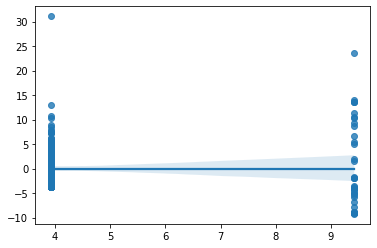

In [18]:
ypredict=model.predict(X)
residue = model.resid
sns.regplot(ypredict,residue)
plt.show()

##### INFERENCE:-FUNNEL SHAPE CAN BE SEEN FROM VISUALIZATION IMPLIES HETEROCEDASTIC

In [19]:
import statsmodels.stats.api as sms
sms.het_goldfeldquandt(residue,X)

(0.41384867825130134, 0.9999999356120454, 'increasing')

HETEROCEDASTIC in which Target variable has unequal variance hence model explains variation in target variable

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Regress the selling price over the present price. Compare the 99% and 95% confidence interval of present price of a car
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
# type your code here
x=df['Present_Price']
y=df['Selling_Price']
X=sm.add_constant(x)
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     1016.
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           3.60e-98
Time:                        19:17:16   Log-Likelihood:                -693.08
No. Observations:                 301   AIC:                             1390.
Df Residuals:                     299   BIC:                             1398.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.7185      0.187      3.847      0.000       0.351       1.086
Present_Price     0.5168      0.016     31.874      0.000       0.485       0.549
==============================================================================
Omnibus:                       59.775   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              926.121
Skew:                           0.084   Prob(JB):                    7.86e-202
Kurtosis:                      11.592   Cond. No.                         15.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

FSTATS EQUAL TO ZERO AND LESS THAN 0.05,HENCE MODEL IS SIGNIFICANCE AND WE CAN USE THIS MODEL.R-square<1-HENCE MODEL IS FIT

In [21]:
#CI = coefficient ± t_table_value*Standard_error
# CI for slope
# calculate the 95% confidence interval
# pass the 'n-1' degrees of freedom to the parameter, 'df' 
# pass the slope coefficient to the parameter, 'loc'
# pass the standard error of slope to the parameter, 'scale'
interval = stats.t.interval(0.95, df = df.shape[1]-1, loc = model.params[1],scale=1)
# print the confidence interval for slope 
print('95% confidence interval:', interval)

95% confidence interval: (-1.847775223614903, 2.8814732784056956)


In [22]:
interval = stats.t.interval(0.99, df = df.shape[1]-1, loc = model.params[1],scale=1)
# print the confidence interval for slope 
print('99% confidence interval:', interval)

99% confidence interval: (-2.9826342699551063, 4.016332324745899)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>9. Verify the statement: The sum of the residuals in any regression model that contains an intercept β<sub>0</sub> is always zero
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

        To verify the result, we will fit a regression model of 'Present_Price' on 'Selling_Price' 

To verify the result, we will fit a regression model of 'Present_Price' on 'Selling_Price'

In [23]:
x=df['Present_Price']
y=df['Selling_Price']
X=sm.add_constant(x)
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     1016.
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           3.60e-98
Time:                        19:17:16   Log-Likelihood:                -693.08
No. Observations:                 301   AIC:                             1390.
Df Residuals:                     299   BIC:                             1398.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.7185      0.187      3.847      0.000       0.351       1.086
Present_Price     0.5168      0.016     31.874      0.000       0.485       0.549
==============================================================================
Omnibus:                       59.775   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              926.121
Skew:                           0.084   Prob(JB):                    7.86e-202
Kurtosis:                      11.592   Cond. No.                         15.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

FSTATS EQUAL TO ZERO AND LESS THAN 0.05,HENCE MODEL IS SIGNIFICANCE AND WE CAN USE THIS MODEL.R-square<1-HENCE MODEL IS FIT

In [24]:
residual=np.round(sum(model.resid))
print('The Sum Of Residual is:',residual)

The Sum Of Residual is: 0.0


Hence Verifed the statement that states The sum of the residuals in any regression model that contains an intercept β0 is always zero

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Consider two models as specified below. Compare the performance of the models
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

                First model:
        
        Selling_Price ~ Year + Present_Price + Kms_Driven + Owner + Fuel_Type + Seller_Type + Transmission
        
        
                Second model:
        
        Selling_Price ~ Year + Present_Price + Kms_Driven + Owner 

In [25]:
x=df.drop('Selling_Price',axis=1)
y=df['Selling_Price']
X=sm.add_constant(x)
model_1=sm.OLS(y,X).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     314.3
Date:                Fri, 29 Oct 2021   Prob (F-statistic):          3.49e-132
Time:                        19:17:16   Log-Likelihood:                -593.74
No. Observations:                 301   AIC:                             1203.
Df Residuals:                     293   BIC:                             1233.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -789.0140     86.407     -9.131      0.000    -959.072    -618.956
Year              0.3933      0.043      9.176      0.000       0.309       0.478
Present_Price     0.4373      0.016     27.405      0.000       0.406       0.469
Kms_Driven    -7.036e-06   3.22e-06     -2.182      0.030   -1.34e-05   -6.89e-07
Fuel_Type         1.8699      0.298      6.273      0.000       1.283       2.457
Seller_Type      -1.1116      0.255     -4.353      0.000      -1.614      -0.609
Transmission     -1.4519      0.327     -4.435      0.000      -2.096      -0.808
Owner            -0.6726      0.422     -1.594      0.112      -1.503       0.158
==============================================================================
Omnibus:                       94.914   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              691.148
Skew:                           1.074   Prob(JB):                    8.30e-151
Kurtosis:                      10.106   Cond. No.                     4.56e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

FSTATS EQUAL TO ZERO AND LESS THAN 0.05,HENCE MODEL IS SIGNIFICANCE AND WE CAN USE THIS MODEL.R-square<1-HENCE MODEL IS FIT

In [26]:
x=df[['Year','Present_Price','Kms_Driven','Owner']]
y=df['Selling_Price']
X=sm.add_constant(X)
model_2=sm.OLS(y,X).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     314.3
Date:                Fri, 29 Oct 2021   Prob (F-statistic):          3.49e-132
Time:                        19:17:16   Log-Likelihood:                -593.74
No. Observations:                 301   AIC:                             1203.
Df Residuals:                     293   BIC:                             1233.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -789.0140     86.407     -9.131      0.000    -959.072    -618.956
Year              0.3933      0.043      9.176      0.000       0.309       0.478
Present_Price     0.4373      0.016     27.405      0.000       0.406       0.469
Kms_Driven    -7.036e-06   3.22e-06     -2.182      0.030   -1.34e-05   -6.89e-07
Fuel_Type         1.8699      0.298      6.273      0.000       1.283       2.457
Seller_Type      -1.1116      0.255     -4.353      0.000      -1.614      -0.609
Transmission     -1.4519      0.327     -4.435      0.000      -2.096      -0.808
Owner            -0.6726      0.422     -1.594      0.112      -1.503       0.158
==============================================================================
Omnibus:                       94.914   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              691.148
Skew:                           1.074   Prob(JB):                    8.30e-151
Kurtosis:                      10.106   Cond. No.                     4.56e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

FSTATS EQUAL TO ZERO AND LESS THAN 0.05,HENCE MODEL IS SIGNIFICANCE AND WE CAN USE THIS MODEL.R-square<1-HENCE MODEL IS FIT

##### Comparing the performance of the models:-

In [27]:
model_1.rsquared_adj#Model 1

0.8796728064235176

In [28]:
model_2.rsquared_adj#Model 2

0.8796728064235176

##### MODEL1 PREDICTION:-

In [29]:
ypred_1=model_1.predict()
ypred_1 #yPredict1 Model1

array([ 3.84095567e+00,  6.93247004e+00,  7.02517997e+00,  2.18477075e+00,
        6.16196513e+00,  9.31362084e+00,  5.39837193e+00,  7.37964575e+00,
        7.98792979e+00,  7.45233073e+00,  4.32544720e+00,  8.03008099e+00,
        7.67286652e+00,  5.16838544e+00,  2.22826383e+00,  8.65894099e+00,
        8.27496897e+00,  8.65894099e+00,  3.95576522e+00,  3.21145201e+00,
        3.92436645e+00,  5.24633053e+00,  5.00949640e+00,  2.78084988e+00,
        2.72142544e+00,  2.44799302e+00,  3.37216348e+00,  4.37879838e+00,
        1.42723700e+00,  8.07229486e+00,  4.92295954e+00,  2.16364183e+00,
        6.45737726e+00,  7.49097359e+00,  6.66443649e+00,  3.43957108e+00,
        4.78517109e+00, -3.74769749e+00,  3.94625428e+00,  3.13901201e-01,
        7.09387725e+00,  2.99822408e+00,  1.94543290e+00,  6.65894868e+00,
        1.62435800e+00,  8.19796793e+00,  2.87749583e+00, -2.02326568e-01,
        5.16930008e+00,  8.02036982e+00,  1.67712691e+01,  1.84063440e+01,
        1.46282194e+01,  

##### COST FUNCTIONS OF MODEL1:-

In [30]:
sse = np.sum((y-ypred_1)**2)
print('The Sum of Squared Error For Model_1 is:',sse)

The Sum of Squared Error For Model_1 is: 910.8344017110264


In [31]:
mse = sse/len(y)
print('The Mean_Squared_Error For Model_1 is:',mse)

The Mean_Squared_Error For Model_1 is: 3.0260279126612173


In [32]:
rmse = np.sqrt(mse)
print('The Root_Mean_Squared Error For Model_1 is:',rmse)

The Root_Mean_Squared Error For Model_1 is: 1.7395481921065645


##### MODEL2 PREDICTION:-

In [33]:
ypred_2=model_2.predict()
ypred_2#YPredict2 Model2

array([ 3.84095567e+00,  6.93247004e+00,  7.02517997e+00,  2.18477075e+00,
        6.16196513e+00,  9.31362084e+00,  5.39837193e+00,  7.37964575e+00,
        7.98792979e+00,  7.45233073e+00,  4.32544720e+00,  8.03008099e+00,
        7.67286652e+00,  5.16838544e+00,  2.22826383e+00,  8.65894099e+00,
        8.27496897e+00,  8.65894099e+00,  3.95576522e+00,  3.21145201e+00,
        3.92436645e+00,  5.24633053e+00,  5.00949640e+00,  2.78084988e+00,
        2.72142544e+00,  2.44799302e+00,  3.37216348e+00,  4.37879838e+00,
        1.42723700e+00,  8.07229486e+00,  4.92295954e+00,  2.16364183e+00,
        6.45737726e+00,  7.49097359e+00,  6.66443649e+00,  3.43957108e+00,
        4.78517109e+00, -3.74769749e+00,  3.94625428e+00,  3.13901201e-01,
        7.09387725e+00,  2.99822408e+00,  1.94543290e+00,  6.65894868e+00,
        1.62435800e+00,  8.19796793e+00,  2.87749583e+00, -2.02326568e-01,
        5.16930008e+00,  8.02036982e+00,  1.67712691e+01,  1.84063440e+01,
        1.46282194e+01,  

##### COST FUNCTION MODEL2:-

In [34]:
sse = np.sum((y-ypred_2)**2)
print('The Sum of Squared Error For Model_2 is:',sse)

The Sum of Squared Error For Model_2 is: 910.8344017110264


In [35]:
mse = sse/len(y)
print('The Mean_Squared_Error For Model_2 is:',mse)

The Mean_Squared_Error For Model_2 is: 3.0260279126612173


In [36]:
rmse = np.sqrt(mse)
print('The Mean_Squared_Error For Model_2 is:',rmse)

The Mean_Squared_Error For Model_2 is: 1.7395481921065645


In [37]:
df_new=pd.DataFrame({'Adj R2 _ Model 1':[0.8796728064235181],
'Adj R2 _ Model 2':[0.8501946996393123],
'RMSE _ model 1':[1.739548192106562],
'RMSE _ model 2':[1.9508784267788237]})

In [38]:
df_new

,Adj R2 _ Model 1,Adj R2 _ Model 2,RMSE _ model 1,RMSE _ model 2
0,0.879673,0.850195,1.739548,1.950878


Model 1 has Higher AdjudtedR2(adjusted R*2) and Low RMSE when compared to Model 2.Hence Model 1 is Significant than Model2,We can Go With Model1